# Hyperparameter Tuning with the Zalando Dataset

Version 1.0

(C) 2020 - Umberto Michelucci, Michela Sperti

This notebook is part of the book _Applied Deep Learning: a case based approach, **2nd edition**_ from APRESS by [U. Michelucci](mailto:umberto.michelucci@toelt.ai) and [M. Sperti](mailto:michela.sperti@toelt.ai).

The purpose of this notebook is to give a practical example (with a dataset taken from the real world) of hyperparameter tuning with Feed-Forward Neural Networks.

## Notebook Learning Goals

At the end of the notebook you are going to know how to tune the hyperparameters of a Feed-Forward Neural Network in Keras, with **grid search** and **random search**.

## Dataset Overview

**Context**

Fashion-MNIST is a dataset of Zalando's article images (consisting of a training set of 60000 examples and a test set of 10000 examples). Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

The original MNIST dataset contains a lot of handwritten digits. Members of the AI/ML/Data Science community love this dataset and use it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others."
Zalando seeks to replace the original MNIST dataset

**Content**


Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed $x$ as $x = 28i + j$, where $i$ and $j$ are integers between 0 and 27. The pixel is located on row $i$ and column $j$ of a 28x28 matrix. 
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top. 

Each row of the dataset is a separate image. Column 1 is the class label. 
Remaining columns are pixel numbers (784 total). Each value is the darkness of the pixel (1 to 255).

**Labels**

Each training and test example is assigned to one of the following labels:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot 

**Acknowledgements**

Original dataset was downloaded from TensorFlow datasets catalog.

**License**

The MIT License (MIT) Copyright © [2017] Zalando SE, https://tech.zalando.com

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the “Software”), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## Libraries and Dataset Import

This section contains the necessary libraries (such as tensorflow or pandas) you need to import to run the notebook.

In [ ]:
# This command install code from the tensorflow docs repository.
# We need to use tensorflow_docs.modeling function when training our model.
# This function will generate a report on the network's perfomances
# step by step during the training phase (see Training Phase section of the
# notebook). 

# You can safely ignore this cell if you don't understand what it does.

!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-tmebecoo
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-tmebecoo


In [ ]:
# general libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from random import *
import time

# tensorflow libraries
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [ ]:
# Referring to the following cell, if you want to re-clone a repository
# inside the google colab instance, you need to delete it first. 
# You can delete the repositories contained in this instance executing 
# the following two lines of code (deleting the # comment symbol).

# !rm -rf ADL-Book-2nd-Ed

In [ ]:
# This command actually clone the repository of the book in the google colab
# instance. In this way this notebook will have access to the modules
# we have written for this book.

# Please note that in case you have already run this cell, and you run it again
# you may get the error message:
#
# fatal: destination path 'ADL-Book-2nd-Ed' already exists and is not an empty directory.
# 
# In this case you can safely ignore the error message.

!git clone https://github.com/toelt-llc/ADL-Book-2nd-Ed.git

fatal: destination path 'ADL-Book-2nd-Ed' already exists and is not an empty directory.


In [ ]:
# This cell imports some custom written functions that we have created to 
# make the plotting easier. You don't need to undertsand the details and 
# you can simply ignore this cell.
# Simply run it with CMD+Enter (on Mac) or CTRL+Enter (Windows or Ubuntu) to
# import the necessary functions.

import sys
sys.path.append('ADL-Book-2nd-Ed/modules/')

from style_setting import set_style

The following cells are needed to **download** the dataset.

In [ ]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

## Helper Functions

In [ ]:
def get_label_name(idx):
  """Returns the corresponding label's name, given its numerical value."""
  
  if (idx == 0):
      return '(0) T-shirt/top'
  elif (idx == 1):
      return '(1) Trouser'
  elif (idx == 2):
      return '(2) Pullover'
  elif (idx == 3):
      return '(3) Dress'
  elif (idx == 4):
      return '(4) Coat'
  elif (idx == 5):
      return '(5) Sandal'
  elif (idx == 6):
      return '(6) Shirt'
  elif (idx == 7):
      return '(7) Sneaker'
  elif (idx == 8):
      return '(8) Bag'
  elif (idx == 9):
      return '(9) Ankle boot'

In [ ]:
def get_random_element_with_label (data, lbls, lbl):
  """Returns one numpy array (one column) with an example of a choosen label."""
  
  tmp = lbls == lbl
  subset = data[tmp.flatten(), :]
  return subset[randint(1, subset.shape[1]), :]

Now you have all the necessary elements to successfully implement this tutorial. **Let's have a look at our data**:

In [ ]:
print('Dimensions of the training dataset: ', trainX.shape)
print('Dimensions of the test dataset: ', testX.shape)
print('Dimensions of the training labels: ', trainY.shape)
print('Dimensions of the test labels: ', testY.shape)

Dimensions of the training dataset:  (60000, 28, 28)
Dimensions of the test dataset:  (10000, 28, 28)
Dimensions of the training labels:  (60000,)
Dimensions of the test labels:  (10000,)


## Dataset Preparation

We now one-hot encode the labels and change the images dimensions, to get easy to use data for later. To know more about one-hot encoding process see the [Further Readings](#fr) section or refer to the hands-on chapter of the book about feed-forward neural networks.

In [ ]:
labels_train = np.zeros((60000, 10))
labels_train[np.arange(60000), trainY] = 1

data_train = trainX.reshape(60000, 784)

In [ ]:
labels_test = np.zeros((10000, 10))
labels_test[np.arange(10000), testY] = 1

data_test = testX.reshape(10000, 784)

In [ ]:
print('Dimensions of the training dataset: ', data_train.shape)
print('Dimensions of the test dataset: ', data_test.shape)
print('Dimensions of the training labels: ', labels_train.shape)
print('Dimensions of the test labels: ', labels_test.shape)

Dimensions of the training dataset:  (60000, 784)
Dimensions of the test dataset:  (10000, 784)
Dimensions of the training labels:  (60000, 10)
Dimensions of the test labels:  (10000, 10)


## Data Normalization

Let's normalize the training data dividing by 255.0 to get the values between 0 and 1.

In [ ]:
data_train_norm = np.array(data_train/255.0)
data_test_norm = np.array(data_test/255.0)

Let's plot an image as example.

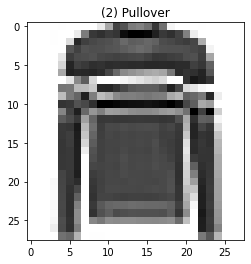

In [ ]:
idx = 5
plt.imshow(data_train_norm[idx, :].reshape(28, 28), cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis("on")
plt.title(get_label_name(trainY[idx]))
plt.show()

Now let's plot one example of each type (label).

In [ ]:
# The following code create a numpy array where in column 0 you will find 
# an example of label 0, in column 1 of label 1 and so on.
labels_overview = np.empty([784, 10])
for i in range (0, 10):
    col = get_random_element_with_label(data_train_norm, trainY, i)
    labels_overview[:,i] = col

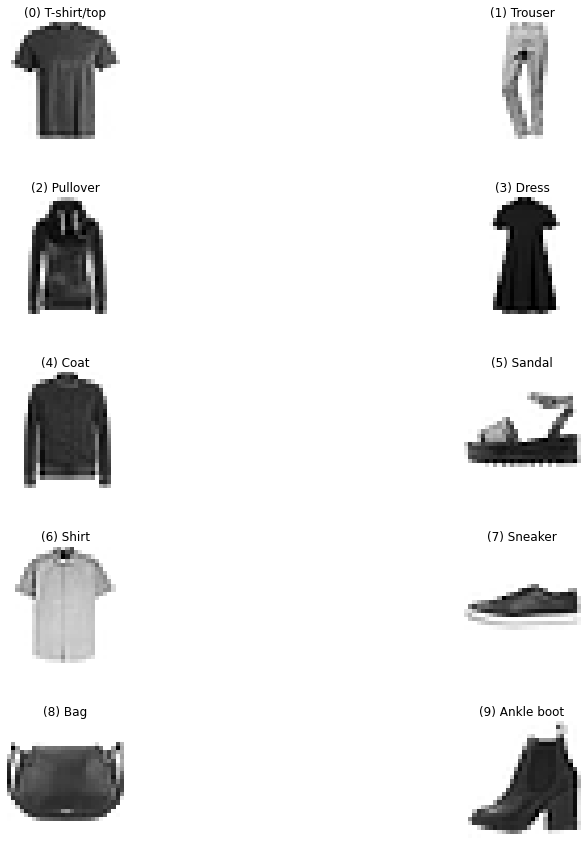

In [ ]:
f = plt.figure(figsize = (15, 15))
count = 1
for i in range(0, 10):
    plt.subplot(5, 2, count)
    count = count + 1
    plt.subplots_adjust(hspace = 0.5)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[:, i].reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    pass

## Feed-forward Network Model with One Hidden Layer 

We will use a feed-forward network model with one single hidden layer. Our model will be made of an input layer of 784 neurons, an hidden layer (our task will be to tune this layer and choosing the best number of neurons fot it) and an output layer of 10 neurons with a softmax function as activation function.

We need to define two functions: one to build the model and one to train it. As parameter to pass to the functions we define the `number_neurons`, i.e., the number of neurons of the network's hidden layer, we want to optimize.

In [ ]:
def build_model(number_neurons, learning_rate):
  # create model
	model = keras.Sequential()
	model.add(layers.Dense(number_neurons, input_dim = 784, activation = 'relu')) # add first hidden layer and set input dimensions
	model.add(layers.Dense(10, activation = 'softmax')) # add output layer
	# compile model
	model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate = learning_rate), metrics = ['categorical_accuracy'])
	return model

In [ ]:
def train_model(number_neurons, learning_rate, number_epochs, mb_size):
  # build model
  model = build_model(number_neurons, learning_rate)
  # train model
  history = model.fit(
    data_train_norm, labels_train,
    epochs = number_epochs, verbose = 0,
    batch_size = mb_size,
    callbacks = [tfdocs.modeling.EpochDots()])
  # test model
  train_loss, train_accuracy = model.evaluate(data_train_norm, labels_train, verbose = 0)
  test_loss, test_accuracy = model.evaluate(data_test_norm, labels_test, verbose = 0)
  return train_accuracy, test_accuracy

Now we can train the model and compute the accuracy on the training and test datasets. We used to accuracy as performance indicator since the dataset is balanced. We first set as number of neurons 15. 

In [ ]:
train_accuracy, test_accuracy = train_model(15, 0.001, 100, 50)


Epoch: 0, categorical_accuracy:0.2652,  loss:2.0472,  
....................................................................................................

In [ ]:
print(train_accuracy)
print(test_accuracy)

0.8548833131790161
0.8396000266075134


As you can see from above, the accuracy is already quite good. Let's try to see if we are able to raise it, testing several numbers of neurons. We can do this easily through a **grid search** approach.

### Grid Search

In [ ]:
nn = [1, 5, 10, 15, 25, 30, 50, 150, 300, 1000, 3000]
accuracy_list = []
for nn_ in nn:
    train_accuracy, test_accuracy = train_model(nn_, 0.001, 100, 50)
    print()
    print('Number of neurons:', nn_, 'Training accuracy:', train_accuracy, 'Test accuracy', test_accuracy)
    accuracy_list.append(test_accuracy)



Epoch: 0, categorical_accuracy:0.0848,  loss:2.3042,  
....................................................................................................
Number of neurons: 1 Training accuracy: 0.10000000149011612 Test accuracy 0.10000000149011612

Epoch: 0, categorical_accuracy:0.1421,  loss:2.2109,  
....................................................................................................
Number of neurons: 5 Training accuracy: 0.8242166638374329 Test accuracy 0.8123000264167786

Epoch: 0, categorical_accuracy:0.3156,  loss:2.0403,  
....................................................................................................
Number of neurons: 10 Training accuracy: 0.8476166725158691 Test accuracy 0.8323000073432922

Epoch: 0, categorical_accuracy:0.4149,  loss:1.7950,  
....................................................................................................
Number of neurons: 15 Training accuracy: 0.8549166917800903 Test accuracy 0.8373000025749207


Not surprisingly more neurons deliver better accuracy, with no signs of overfitting of the train dataset, since the accuracy on the test dataset is almost equal to the one on the train dataset. 

Now let's plot **the accuracy on the test dataset vs. the number of neurons in the hidden layer**. Note that the x-axis uses a *logarithmic scale*, to make the changes more evident.

In [ ]:
# The following line contains the path to fonts that are used to plot result in
# a uniform way.

f = set_style().set_general_style_parameters()

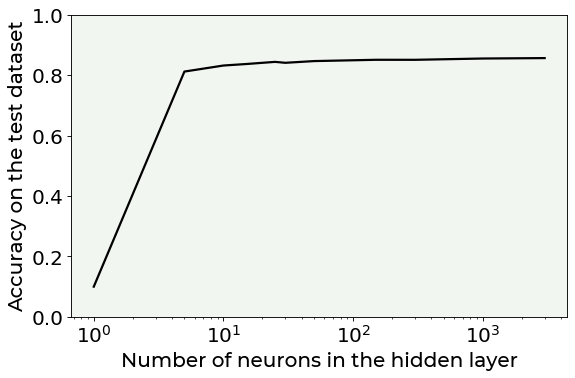

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(nn, accuracy_list, color = 'black')

plt.ylabel('Accuracy on the test dataset', fontproperties = fm.FontProperties(fname = f))
plt.xlabel('Number of neurons in the hidden layer', fontproperties = fm.FontProperties(fname = f))

plt.ylim(0,1)

plt.axis(True)
plt.xscale('log')

#fig.savefig('Figure8-26.png', dpi = 300, bbox_inches = 'tight')
plt.show()

If your goal would be to reach 80% of accuracy you could well stop here. But there are a few things to consider: first, we may be able to do better, and secondly training the network with 3000 neurons takes quite some time. 

*We should see if we can get the same result in a fraction of the time*. We want a model that trains as fast as we can! Let us try a slightly different approach. Since we want to be faster let us consider **a model with 4 layers**. We could also tune the number of layers but let us stick to 4 for this example and let us tune the other parameters. 

We will try to find the optimal value for: 
1. learning rate
2. minibatch size
3. number of neurons in each layer 
4. number of epochs. 

### Random Search

For each parameter we will select *randomly* 10 values:
1. Learning rate: we will use the search on the logarithmic scale between $10^{-1}$ and $10^{-3}$
2. Minibatch size: between $20$ and $80$
3. Number of neurons: between $35$ and $60$ 
4. Number of epochs: between $40$ and $100$.


In [ ]:
neurons_ = np.random.randint(low = 35, high = 60.0, size = (10))
r = - np.random.random([10])*3.0 - 1
learning_ = 10**r
mb_size_ = np.random.randint(low = 20, high = 80, size = 10)
epochs_ = np.random.randint(low = 40, high = 100, size = (10))

Let's print the result for every possible combination.

In [ ]:
for i in range(len(neurons_)):
    train_accuracy, test_accuracy = train_model(neurons_[i], learning_[i], epochs_[i], mb_size_[i])
    print()
    print('Epochs:', epochs_[i], 'Number of neurons:', neurons_[i], 'Learning rate:', learning_[i], 'Minibatch size', mb_size_[i],
          'Training accuracy:', train_accuracy, 'Test Accuracy', test_accuracy)


Epoch: 0, categorical_accuracy:0.7851,  loss:0.6132,  
............................................
Epochs: 44 Number of neurons: 36 Learning rate: 0.0753702006793808 Minibatch size 54 Training accuracy: 0.9013166427612305 Test Accuracy 0.8636999726295471

Epoch: 0, categorical_accuracy:0.1460,  loss:2.2589,  
............................................................
Epochs: 60 Number of neurons: 47 Learning rate: 0.0001505449519265441 Minibatch size 51 Training accuracy: 0.7894999980926514 Test Accuracy 0.7763000130653381

Epoch: 0, categorical_accuracy:0.7553,  loss:0.7407,  
....................................................................................
Epochs: 84 Number of neurons: 54 Learning rate: 0.02191786021047373 Minibatch size 58 Training accuracy: 0.9240666627883911 Test Accuracy 0.8770999908447266

Epoch: 0, categorical_accuracy:0.4805,  loss:1.6619,  
...........................................................................
Epochs: 75 Number of neurons: 43 Lear

You will find that the combinations with 44 epochs, 36 neurons in each layer, a learning rate of 0.07537 and a minibatch size of 54 gives you an accuracy on the dev dataset of 0.86. Not bad, considering that this is also faster than the model with 1 layer and 3000 neurons and 6% better. 

Our naïve initial test gave us an accuracy of 0.84, so with hyperparameter tuning we got 2% better than our initial guess. In the deep learning this is considered a good result. What we did should give you an idea of how powerful hyperparameter tuning can be if done properly. Keep in mind you should spend quite some time doing it, and especially thinking about how to do it. 

## Exercises

1. [*Easy Difficulty*] Try different optimizers (for example Adam) and consider wider ranges for the parameters, more parameters combinations and so on. See how results change.
2. [*Hard Difficulty*] Try to implement Bayesian Optimization. You can find all implementation details in Chapter 8 of the book. 
3. [*Medium Difficulty*] Try to optimize a multiclass classification model like the one we saw together in this notebook, but with a different dataset, the MNIST database of handwritten digits (http://yann.lecun.com/exdb/mnist/). To download the dataset from TensorFlow use the following lines of code:
```
from tensorflow import keras 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
```

## Further Readings <a name = "fr"></a>

**Fashion-MNIST dataset**

1. Xiao, Han, Kashif Rasul, and Roland Vollgraf. "Fashion-mnist: a novel image dataset for benchmarking machine learning algorithms." arXiv preprint arXiv:1708.07747 (2017)